In [1]:
# This code calculates the mean absolute magnitudes of the CCSN sample and plots it with one sigma deviation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statistics as st
import warnings
warnings.filterwarnings("ignore")
data_path='Supernova sample with absolutes.csv'
df = pd.read_csv(data_path)

In [2]:
# divide the sample into bins of 5 Mpc and calculate the mean and std at each distance

df_abs = df[df['Absolute magnitude'].notna()==True]
f = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(0, 5, 'both'),'Absolute magnitude']
e = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(5, 10, 'both'),'Absolute magnitude']
d = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(10, 15, 'both'),'Absolute magnitude']
c = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(15, 20, 'both'),'Absolute magnitude']
b = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(20, 25, 'both'),'Absolute magnitude']
a = df_abs.loc[df_abs['Host galaxy distance (Mpc)'].between(25, 30, 'both'),'Absolute magnitude']
means = [st.mean(f), st.mean(e), st.mean(d), st.mean(c), st.mean(b), st.mean(a)]
stdevs = np.array([st.stdev(f), st.stdev(e), st.stdev(d), st.stdev(c), st.stdev(b), st.stdev(a)])

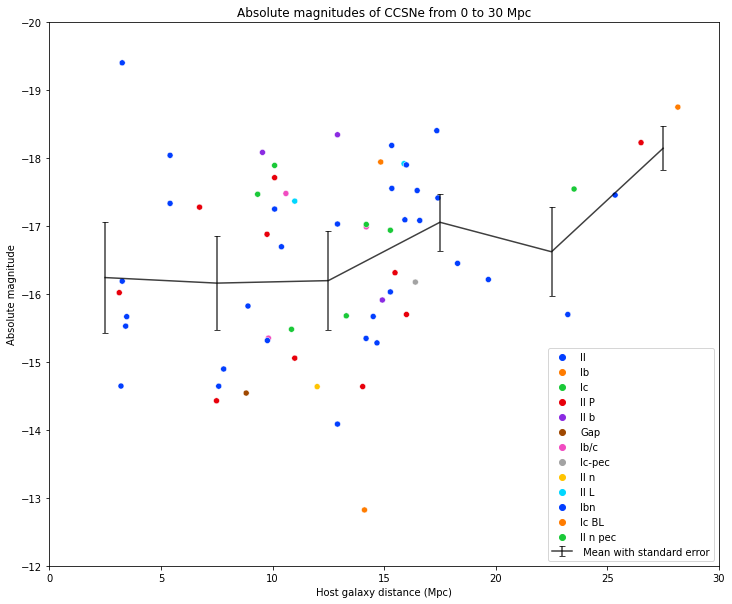

In [3]:
# plot the results

sns.scatterplot(df['Host galaxy distance (Mpc)'],df['Absolute magnitude'], hue = df['Type'], palette = 'bright')
plt.errorbar(x = [2.5,7.5,12.5,17.5,22.5,27.5], y = means, yerr = [stdevs/2,stdevs/2], ecolor='black',color='black',capsize=3,alpha=0.75, label=' Mean with standard error')
plt.legend()
plt.gca().invert_yaxis()
plt.xlim(0,30)
plt.ylim(-12,-20)
plt.title('Absolute magnitudes of CCSNe from 0 to 30 Mpc')
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.savefig('Absolute magnitude of CCSNe from 0 to 30 Mpc.jpg')